In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl

In [4]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
cdf = df[["ENGINESIZE", "CYLINDERS","FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB","CO2EMISSIONS",]]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267
9,2.4,4,10.6,7.5,9.2,212


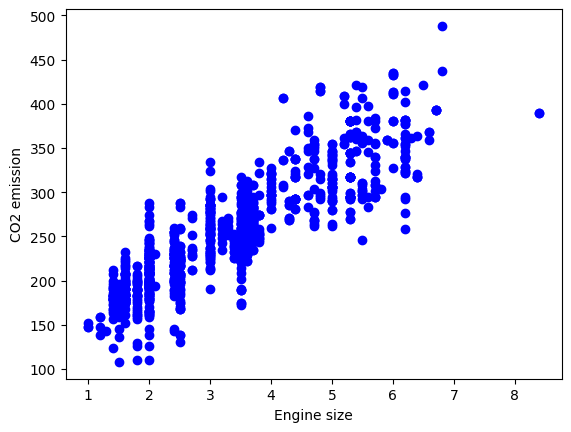

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color ="blue")
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")
plt.show()

In [9]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

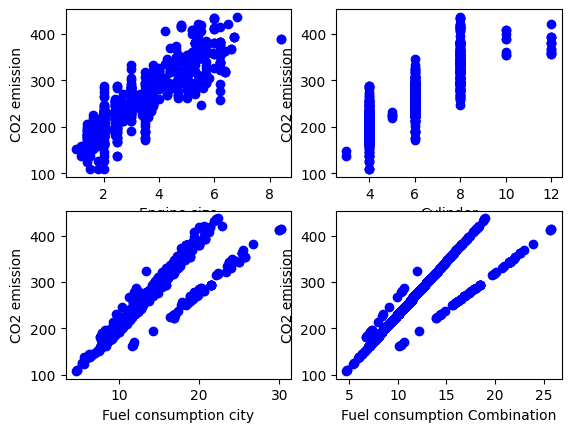

In [20]:
fig = plt.figure()

plt.subplot(2, 2, 1)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("CO2 emission")

plt.subplot(2, 2, 2)
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Cylinder")
plt.ylabel("CO2 emission")

plt.subplot(2, 2, 3)
plt.scatter(train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Fuel consumption city")
plt.ylabel("CO2 emission")

plt.subplot(2, 2, 4)
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Fuel consumption Combination")
plt.ylabel("CO2 emission")

plt.show()

In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)

print(f'Coeficients are : {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

Coeficients are : [[11.31755438  7.54133617  9.37470482]]
Intercept: [65.92955416]


In [73]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
y_hat = regr.predict(test_x)

test__x = np.asanyarray([[3.3, 6.,7.5],[3.8, 6., 10]])
print(f'{test__x}\n')
print(regr.predict(test__x))


print("\n")
print("Residual sum of squares: %.2f" % np.mean((y_hat - test_y)**2))
print("Variance score: %.2f" % r2_score(y_hat,test_y))

[[ 3.3  6.   7.5]
 [ 3.8  6.  10. ]]

[[218.83578684]
 [247.93132609]]


Residual sum of squares: 540.25
Variance score: 0.84
